In [112]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [138]:
Alone=0
Spontan=1
Sync=2

def LoadData(path):
        AloneList=[];SpontanList=[];SyncList=[]
        all_files = glob.glob(path + "/*")
        for folder in all_files:
            print("\nloading in" ,os.path.basename(folder), ':')
            files = glob.glob(folder + "/*.csv")
            files=last3(files)
            for filename in files:
                df = pd.read_csv(filename, index_col=None, header=0)
                type = None
                
                if("Alone" in filename):
                    type = Alone
                    df=transform(df,type)
                    df["State"] = type
                    AloneList.append(df)
                elif("Sync" in filename):
                    type = Sync
                    df=transform(df,type)
                    df["State"] = type
                    SyncList.append(df)
                elif("Spontan" in filename):
                    type = Spontan
                    df=transform(df,type)
                    df["State"] = type
                    SpontanList.append(df)
                   
                print(os.path.basename(filename), type)
        listData = np.array([AloneList,SpontanList,SyncList],dtype=object)
        return listData


def last3(files):
    lafile=[]
    for i in range(3):
        latest_file = max(files, key=os.path.getmtime)
        lafile.append(latest_file)
        files.remove(latest_file)
    return lafile

def transform(df,type):
    df=df.dropna().reset_index(drop=True)
    x=df.iloc[:,0][0]
    df.iloc[:,0] = df.iloc[:,0] - x
    df =remove7(df)
    df.columns = [c.replace(' ', '').replace('#', '') for c in df.columns]  
    if type==0:
        return df
    df = df[df.iloc[:,3] != 1]
    df = df.drop(columns=df.columns[3])
    df_right=df[df.iloc[:, 2]=='right'].reset_index(drop=True)
    df_left=df[df.iloc[:, 2]=='left'].reset_index(drop=True)
    df_right = df_right.drop(columns=df_right.columns[2])
    df_left = df_left.drop(columns=df_left.columns[2])
    df=pd.merge(df_right, df_left, left_index=True, right_index=True)
    df.columns=[c.replace('_x', 'Right').replace('_y', 'Left') for c in df.columns]
    return df

    
def remove7(df):
    return df[df.iloc[:,0]>7].reset_index(drop=True)

# def toVector(df):
#     j=0;arr=[]
#     for i in range(5):
#         df1=df.iloc[j::5, :]
#         arr.append(df1)
#         j+=1
#     df2=pd.concat(arr,join='inner')
#     return arr


In [154]:
pathTrain=r'C:\Users\נעמיה\data-science\extraFiles\Training'
pathTest=r'C:\Users\נעמיה\data-science\extraFiles\Validation'
print('Load the train data:')
listTrain=LoadData(pathTrain)
print('\nLoad the test data:')
listTest=LoadData(pathTest)

Load the train data:

loading in Evyatar Cohen :
Evyatar636771054555711409Alone.csv 0
Evyatar636771053639929594Sync.csv 2
Evyatar636771052727603804Spontan.csv 1

loading in Nofar Social_Nuero :
Nofar636759797397919664Sync.csv 2
Nofar636759796290435160Alone.csv 0
Nofar636759795182793299Spontan.csv 1

loading in Oriya Social_Nuero :
Oriya636759806131350399Sync.csv 2
Oriya636759805268396661Alone.csv 0
Oriya636759804404113837Spontan.csv 1

loading in Orya Kalmanovitz :
OryaB636771084494502229Sync.csv 2
OryaB636771083605535985Spontan.csv 1
OryaB636771082736601528Alone.csv 0

loading in Revital Marbel :
Revital636770957894370062Sync.csv 2
Revital636770957038873193Spontan.csv 1
Revital636770955999435879Alone.csv 0

loading in Shahar Terner :
Sachar636771047408504303Alone.csv 0
Sachar636771046527112972Sync.csv 2
Sachar636771045591258071Spontan.csv 1

loading in Shelly Social_Nuero :
Shelly636759789526313406Sync.csv 2
Shelly636759788383205274Alone.csv 0
Shelly636759787508979097Spontan.csv 1

lo

In [155]:
print(listTrain.shape)
print(listTest.shape)

(3, 9)
(3, 3)


In [117]:
AloneRight = pd.read_csv(r'C:\Users\נעמיה\data-science\extraFiles\HandRight.csv')
AloneRight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Time             4812 non-null   float64
 1    Frame ID        4812 non-null   int64  
 2    Hand Type       4812 non-null   object 
 3    # hands         4812 non-null   int64  
 4    Position X      4812 non-null   float64
 5    Position Y      4812 non-null   float64
 6    Position Z      4812 non-null   float64
 7    Velocity X      4812 non-null   float64
 8    Velocity Y      4812 non-null   float64
 9    Velocity Z      4812 non-null   float64
 10   Pitch           4812 non-null   float64
 11   Roll            4812 non-null   float64
 12   Yaw             4812 non-null   float64
 13   Wrist Pos X     4428 non-null   float64
 14   Wrist Pos Y     4428 non-null   float64
 15   Wrist Pos Z     4428 non-null   float64
 16   Elbow pos X     4428 non-null   float64
 17   Elbow Pos Y  

In [118]:
#drop rows with NaN value
AloneRight = AloneRight.dropna()

#change columns name
AloneRight = transform(AloneRight,0)

#replace 'left' at 'right'
for index, row in AloneRight.iterrows():
    AloneRight.loc[index,'HandType']='right'
    
#if there are duplicate rows - delete them
AloneRight=AloneRight.drop_duplicates()

In [119]:
def mergeAlone(listdata):
    for i in range(len(listdata[Alone])):
        temp=AloneRight
        if len(listdata[Alone][i])>len(AloneRight):
            temp=pd.concat([AloneRight,AloneRight]).reset_index(drop=True)
        spare=len(temp)-len(listdata[Alone][i])
        temp.drop(temp.tail(spare).index,inplace=True)
        df=pd.merge(temp, listdata[Alone][0], left_index=True, right_index=True)
        df.columns=[c.replace('_x', 'Right').replace('_y', 'Left') for c in df.columns]
        listdata[Alone][i] = df

In [121]:
listTrain[Spontan][1].columns

Index(['TimeRight', 'FrameIDRight', 'HandTypeRight', 'PositionXRight',
       'PositionYRight', 'PositionZRight', 'VelocityXRight', 'VelocityYRight',
       'VelocityZRight', 'PitchRight', 'RollRight', 'YawRight',
       'WristPosXRight', 'WristPosYRight', 'WristPosZRight', 'ElbowposXRight',
       'ElbowPosYRight', 'ElbowPosZRight', 'GrabStrenthRight',
       'GrabAngleRight', 'PinchStrengthRight', 'TimeLeft', 'FrameIDLeft',
       'HandTypeLeft', 'PositionXLeft', 'PositionYLeft', 'PositionZLeft',
       'VelocityXLeft', 'VelocityYLeft', 'VelocityZLeft', 'PitchLeft',
       'RollLeft', 'YawLeft', 'WristPosXLeft', 'WristPosYLeft',
       'WristPosZLeft', 'ElbowposXLeft', 'ElbowPosYLeft', 'ElbowPosZLeft',
       'GrabStrenthLeft', 'GrabAngleLeft', 'PinchStrengthLeft', 'State'],
      dtype='object')

In [92]:
temp=AloneRight
if len(listdata[Alone][0])>len(AloneRight):
    temp=pd.concat([AloneRight,AloneRight]).reset_index(drop=True)
# temp['FrameID']= temp['FrameID']-temp['FrameID'][0]
spare=len(temp)-len(listdata[Alone][0])
temp.drop(temp.tail(spare).index,inplace=True)
temp

,Time,FrameID,HandType,hands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,VelocityZ,...,Yaw,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength
0,7.0141,16287,right,1,11.93032,199.9861,4.981665,-35.512210,-165.34660,-57.68153,...,-0.906612,75.45740,206.0521,45.38764,284.3946,140.0167,201.9318,0.0,0.561324,0.0
1,7.0311,16289,right,1,11.19190,195.3075,3.661716,-43.587440,-309.83740,-77.18515,...,-0.904311,74.46141,202.4562,44.28679,282.6278,140.9712,203.6773,0.0,0.626321,0.0
2,7.0474,16291,right,1,10.53308,189.0297,2.829388,-30.403600,-363.00330,-43.79815,...,-0.901862,73.60060,197.4387,43.54082,280.6384,142.5401,206.7526,0.0,0.636596,0.0
3,7.0641,16293,right,1,10.24300,181.9816,2.064330,-15.424000,-423.21200,-43.99948,...,-0.901268,73.19537,191.7202,42.73155,279.7357,148.1382,209.9330,0.0,0.701644,0.0
4,7.0807,16295,right,1,10.02061,174.8592,1.228467,-8.733602,-413.45130,-53.88054,...,-0.897777,72.68671,186.1613,41.98006,278.6890,152.5215,212.1112,0.0,0.786548,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,8.5304,16462,right,1,13.28278,163.9919,24.940960,44.693480,-46.42855,64.97504,...,-0.702845,67.87458,172.6170,76.80444,247.3050,143.3844,275.6685,0.0,0.463589,0.0
4099,8.5468,16464,right,1,13.71593,161.7758,25.692140,20.701590,-149.39250,45.11576,...,-0.695191,67.89079,169.6017,78.13200,244.3223,140.6269,279.7040,0.0,0.508077,0.0
4100,8.5638,16466,right,1,14.01267,158.6390,27.023000,20.704920,-182.82720,100.14000,...,-0.691167,67.93107,166.4908,79.70734,242.3087,136.4678,282.9136,0.0,0.524940,0.0
4101,8.5802,16468,right,1,14.14357,154.5999,28.780680,4.193686,-246.83990,101.74530,...,-0.686824,67.80099,163.0233,81.64207,241.1522,134.7897,285.9885,0.0,0.531801,0.0


In [97]:
df=pd.merge(temp, listdata[Alone][0], left_index=True, right_index=True)
df.columns=[c.replace('_x', 'Right').replace('_y', 'Left') for c in df.columns]

In [128]:
df.columns[[0,1]][0]

'Time'

In [10]:
def tooVector(df):
    j=0;arr=[]
    for i in range(5):
        df1=df.iloc[j::5, :]
        arr.append(df1)
        j+=1
    df2=pd.DataFrame(f5.values.reshape(1, -1))
#     df2=pd.concat(arr,join='inner')
    return df2
df3=listdata[0][0].iloc[::12, :]
# df4=df3.iloc[1::5, :]
df3=tooVector(df3)


In [11]:
df3

,Time,FrameID,HandType,hands,PositionX,PositionY,PositionZ,VelocityX,VelocityY,VelocityZ,...,WristPosX,WristPosY,WristPosZ,ElbowposX,ElbowPosY,ElbowPosZ,GrabStrenth,GrabAngle,PinchStrength,State
0,7.0098,150428,left,1,-52.96039,184.5535,-2.856696,162.152700,127.605200,-85.837820,...,-101.04550,132.5940,4.449887,-307.7127,-12.177800,5.125422,0.000000,0.073635,0.000000,0
60,8.0038,150543,left,1,-40.31709,198.5134,-9.883607,52.858390,126.749100,-34.202190,...,-93.75538,156.8296,10.399720,-332.4009,75.665710,21.862740,1.000000,3.141593,0.827585,0
120,8.9978,150657,left,1,-53.30686,200.7575,29.578700,-141.902700,141.449500,159.599000,...,-106.63730,154.3741,22.674020,-328.3324,36.592950,48.326410,0.000000,0.000000,0.000000,0
180,9.9918,150772,left,1,-113.40160,222.1451,48.920340,-137.831200,87.713180,-108.493200,...,-168.46440,180.2063,36.158310,-275.6274,-38.380530,-30.287680,0.000000,0.000000,0.000000,0
240,10.9858,150887,left,1,-126.04740,209.7240,28.373040,-219.479900,-39.513610,-96.345720,...,-187.90700,214.9560,-2.656977,-366.3320,49.294990,-69.135630,0.000000,0.858688,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3828,70.4352,157738,left,1,-66.22540,217.9385,-26.048650,-138.082500,483.274700,98.917340,...,-133.27990,196.3271,-12.590060,-358.8199,79.263530,-4.181422,0.000000,1.224039,0.000000,0
3888,71.4300,157853,left,1,-69.17222,252.3559,49.317050,-121.757600,101.881900,82.173620,...,-106.05250,192.3368,35.497610,-259.6681,-4.991153,-10.402610,0.198723,1.625546,0.807807,0
3948,72.4242,157967,left,1,-144.71350,197.7089,55.478130,-3.249075,-1.086036,-4.228485,...,-157.70020,138.7057,18.276290,-308.2838,-56.783180,-42.974060,1.000000,3.141593,0.797971,0
4008,73.4182,158082,left,1,-17.96166,209.5925,22.430520,1.925329,53.545190,12.502670,...,-62.66420,154.2098,14.947680,-269.6578,6.608166,18.909520,0.000000,0.000000,0.000000,0


In [729]:
df=listdata[Spontan][8]
df.columns = [c.replace(' ', '').replace('#', '') for c in df.columns]
x=df.iloc[:,0][0]
df.iloc[:,0] = df.iloc[:,0] - x
df =remove7(df)
df.hands.value_counts()
# df = df[df.hands != 1]
# df

AttributeError: 'DataFrame' object has no attribute 'hands'

In [611]:
df_right=df[df.iloc[:, 2]=='right'].reset_index(drop=True)
df_left=df[df.iloc[:, 2]=='left'].reset_index(drop=True)
df=pd.merge(df_right, df_left, left_index=True, right_index=True)
df

,Time_x,FrameID_x,HandType_x,hands_x,PositionX_x,PositionY_x,PositionZ_x,VelocityX_x,VelocityY_x,VelocityZ_x,...,WristPosX_y,WristPosY_y,WristPosZ_y,ElbowposX_y,ElbowPosY_y,ElbowPosZ_y,GrabStrenth_y,GrabAngle_y,PinchStrength_y,State_y
0,7.0289,45853,right,2,129.3655,187.0992,135.53780,41.74105,128.08860,49.132630,...,-128.6434,133.1411,48.90355,-292.8215,-35.96725,155.21050,0.000000,0.000000,0.000000,1
1,7.0621,45856,right,2,131.3182,192.6864,137.28280,42.17981,181.62410,33.076820,...,-126.4426,130.2389,47.94522,-288.9359,-32.41331,166.05090,0.000000,0.000000,0.000000,1
2,7.0958,45859,right,2,133.5731,196.0686,136.94050,75.88845,60.37917,-47.221610,...,-124.9247,129.5864,47.85117,-283.7045,-33.70733,170.05150,0.000000,0.000000,0.000000,1
3,7.1282,45862,right,2,138.8241,201.2119,136.15790,135.98590,175.42600,-63.199950,...,-122.7036,128.1905,47.93563,-272.1019,-49.34357,161.82410,0.000000,0.000000,0.000000,1
4,7.1614,45865,right,2,145.0991,204.9267,131.91550,198.74750,86.22846,-172.332200,...,-120.4437,127.4025,46.38125,-258.2015,-69.43075,141.71360,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,74.8048,52505,right,2,145.7597,165.2668,-11.46475,91.24690,13.51082,-246.509300,...,-122.3104,155.2745,46.46809,-248.2816,-59.02841,118.86250,0.705491,2.090956,0.902568,1
1910,74.8385,52509,right,2,150.4383,166.7286,-20.47393,125.38030,45.90799,-203.121800,...,-121.6544,144.0002,45.22044,-262.4403,-65.83310,101.24810,0.000000,1.569239,0.000000,1
1911,74.8718,52512,right,2,154.7135,169.0202,-25.62977,146.81950,88.37846,-162.631200,...,-121.2401,146.1889,44.91408,-263.3239,-65.38571,89.68940,0.000000,1.299514,0.000000,1
1912,74.9057,52516,right,2,158.5187,172.6876,-29.32913,62.95145,93.99306,-63.022420,...,-120.1531,144.5244,44.43902,-276.8819,-56.07000,90.44517,0.000000,0.542512,0.000000,1


In [504]:
df2 = pd.read_csv(r'C:\Users\נעמיה\data-science\extraFiles\Training\Evyatar Cohen\Evyatar636771053639929594Sync.csv')
ef2=pd.read_csv(r'C:\Users\נעמיה\data-science\extraFiles\Training\Evyatar Cohen\Evyatar636771052727603804Spontan.csv')

# df.columns = [c.replace(' ', '').replace('#', '') for c in df.columns]


In [506]:
df2=transform(df2,Sync)
ef2=transform(ef2,Spontan)


In [508]:
list(ef2.columns)

['TimeRight',
 'FrameIDRight',
 'HandTypeRight',
 'handsRight',
 'PositionXRight',
 'PositionYRight',
 'PositionZRight',
 'VelocityXRight',
 'VelocityYRight',
 'VelocityZRight',
 'PitchRight',
 'RollRight',
 'YawRight',
 'WristPosXRight',
 'WristPosYRight',
 'WristPosZRight',
 'ElbowposXRight',
 'ElbowPosYRight',
 'ElbowPosZRight',
 'GrabStrenthRight',
 'GrabAngleRight',
 'PinchStrengthRight',
 'stateRight',
 'TimeLeft',
 'FrameIDLeft',
 'HandTypeLeft',
 'handsLeft',
 'PositionXLeft',
 'PositionYLeft',
 'PositionZLeft',
 'VelocityXLeft',
 'VelocityYLeft',
 'VelocityZLeft',
 'PitchLeft',
 'RollLeft',
 'YawLeft',
 'WristPosXLeft',
 'WristPosYLeft',
 'WristPosZLeft',
 'ElbowposXLeft',
 'ElbowPosYLeft',
 'ElbowPosZLeft',
 'GrabStrenthLeft',
 'GrabAngleLeft',
 'PinchStrengthLeft',
 'stateLeft']

In [492]:
df3=df2.query('56<=TimeRight<=58')
df3=df3.iloc[::2,]
ef3=ef2.query('34<=TimeRight<=36')
ef3=ef3.iloc[::2,]

<IPython.core.display.Javascript object>


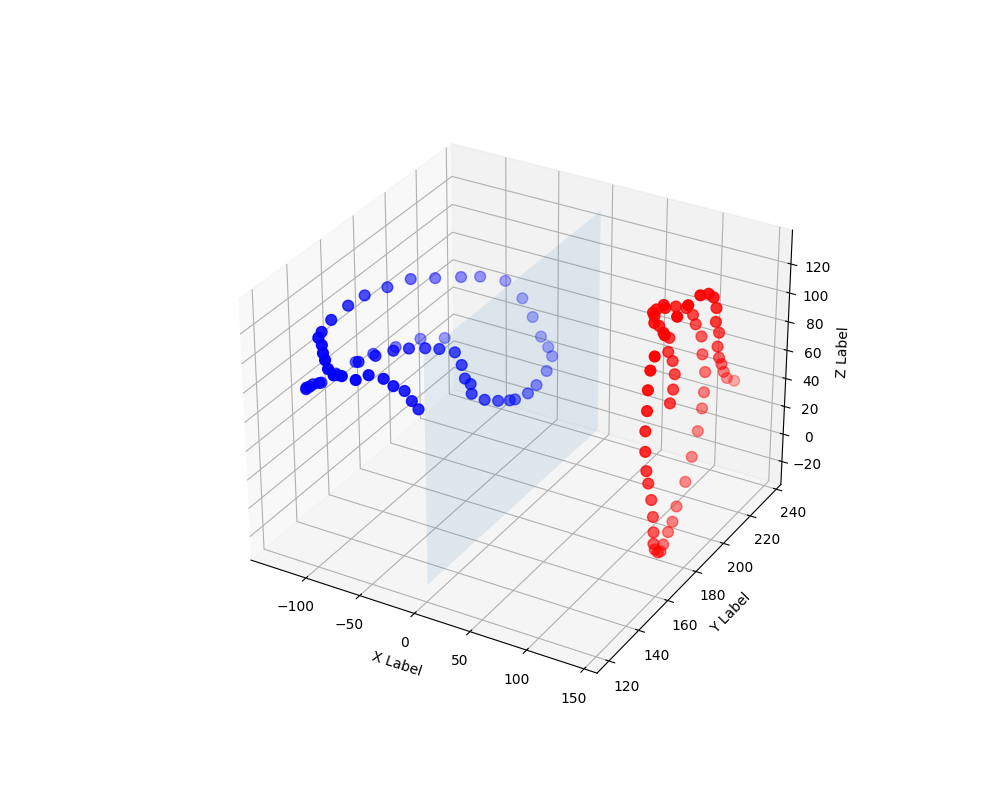

In [493]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
from matplotlib.patches import Rectangle, PathPatch
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection



fig = plt.figure(1,figsize=(10,8),)
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(df3['PositionXRight'], df3['PositionYRight'], df3['PositionZRight'], c='r', marker='o',s=60)
ax.scatter(df3['PositionXLeft'], df3['PositionYLeft'], df3['PositionZLeft'], c='b', marker='o',s=60)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
def Max(sr1,sr2):
    return max(max(sr1),max(sr2))
def Min(sr1,sr2):
    return min(min(sr1),min(sr2))
ymin=Min(df3['PositionYLeft'],df3['PositionYRight'])
zmin=Min(df3['PositionZLeft'],df3['PositionZRight'])
ymax=Max(df3['PositionYLeft'],df3['PositionYRight'])
zmax=Max(df3['PositionZLeft'],df3['PositionZRight'])

x = [0, 0, 0, 0]
y = [ymin, ymin, ymax, ymax]
z = [zmin, zmax, zmin, zmax]

vertices = [[0, 1, 2], [0, 1, 3], [0, 2, 3], [1, 2, 3]]
tupleList = list(zip(x, y, z))
poly3d = [[tupleList[vertices[ix][iy]] for iy in range(len(vertices[0]))] for ix in range(len(vertices))]
# ax.scatter(x,y,z)
collection = Poly3DCollection(poly3d, linewidths=1, alpha=0.05)
# face_color = [0.5, 0.1, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
# collection.set_facecolor(face_color)
ax.add_collection3d(collection)

# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.scatter(ef3['PositionXRight'], ef3['PositionYRight'], ef3['PositionZRight'], c='brown', marker='o',s=60)
# ax.scatter(ef3['PositionXLeft'], ef3['PositionYLeft'], ef3['PositionZLeft'], c='purple', marker='o',s=60)
# ymin=Min(ef3['PositionYLeft'],ef3['PositionYRight'])
# zmin=Min(ef3['PositionZLeft'],ef3['PositionZRight'])
# ymax=Max(ef3['PositionYLeft'],ef3['PositionYRight'])
# zmax=Max(ef3['PositionZLeft'],ef3['PositionZRight'])

# x = [0, 0, 0, 0]
# y = [ymin, ymin, ymax, ymax]
# z = [-70, 10, -70, 10]

# vertices = [[0, 1, 2], [0, 1,0], [0, 2, 0], [0,0, 1]]
# tupleList = list(zip(x, y, z))
# collection = Poly3DCollection(poly3d, linewidths=5, alpha=0.05)
# # face_color = [0.5, 0.1, 1] # alternative: matplotlib.colors.rgb2hex([0.5, 0.5, 1])
# # collection.set_facecolor(face_color)
# ax.add_collection3d(collection,zs=-10)
# zmax

In [4]:
# for i in df.iloc[:, 1]:

df_right=df[df.iloc[:, 2]=='right'].reset_index(drop=True)
df_left=df[df.iloc[:, 2]=='left'].reset_index(drop=True)
df2=pd.merge(df_right, df_left, left_index=True, right_index=True)
df2.columns=[c.replace('_x', 'Right').replace('_y', 'Left') for c in df2.columns]
df2

,TimeRight,FrameIDRight,HandTypeRight,handsRight,PositionXRight,PositionYRight,PositionZRight,VelocityXRight,VelocityYRight,VelocityZRight,...,YawLeft,WristPosXLeft,WristPosYLeft,WristPosZLeft,ElbowposXLeft,ElbowPosYLeft,ElbowPosZLeft,GrabStrenthLeft,GrabAngleLeft,PinchStrengthLeft
0,434.2387,139878,right,2,121.9688,230.3867,61.91891,7.825050,-222.591000,121.91490,...,0.624079,-107.3702,221.7536,46.12994,-254.8560,22.47225,40.89467,0.0,0.0,0.0
1,434.2553,139880,right,2,121.6194,226.1235,64.10963,-32.326430,-248.082700,109.73410,...,0.653397,-106.8187,220.1253,48.09507,-258.4003,23.92692,43.43317,0.0,0.0,0.0
2,434.2718,139882,right,2,121.0388,222.2049,65.98412,-28.869160,-210.964200,109.70620,...,0.683048,-106.3970,217.4241,50.26434,-262.3120,24.76191,42.24427,0.0,0.0,0.0
3,434.2884,139884,right,2,120.6072,219.1105,67.75517,-18.538570,-156.224000,112.23140,...,0.709288,-105.9420,213.8663,52.21570,-271.2896,29.79138,35.81071,0.0,0.0,0.0
4,434.3050,139885,right,2,120.4184,217.8251,68.88145,-22.010350,-149.861400,131.31480,...,0.731741,-105.8699,212.5583,53.02802,-275.5691,32.85570,32.98580,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,502.1338,147698,right,2,111.3970,182.9246,34.27466,-42.475920,-117.845800,-61.32522,...,1.065970,-127.3144,194.4717,59.52803,-299.5664,15.22464,16.52840,0.0,0.0,0.0
4099,502.1499,147700,right,2,110.0870,180.8389,32.92039,-71.148420,-111.439600,-69.28531,...,1.007618,-126.9333,193.0801,58.90355,-298.9101,12.87815,18.89758,0.0,0.0,0.0
4100,502.1665,147702,right,2,109.1714,179.3461,31.84416,-46.123690,-69.914710,-57.69822,...,0.956325,-126.9241,191.1363,58.91284,-302.6545,12.99574,26.75648,0.0,0.0,0.0
4101,502.1830,147704,right,2,108.9017,178.8129,31.02029,-15.531000,-5.445981,-50.80544,...,0.901075,-126.4018,188.6597,59.13661,-308.9988,15.97083,37.08796,0.0,0.0,0.0


In [276]:
f5=df3.query('72<=TimeRight<=73')
f5.stack(

3924  TimeRight               72.02
      FrameIDRight           147366
      HandTypeRight           right
      handsRight                  2
      PositionXRight       104.8376
                             ...   
3972  ElbowPosZLeft        5.019966
      GrabStrenthLeft           0.0
      GrabAngleLeft             0.0
      PinchStrengthLeft         0.0
      stateLeft                   1
Length: 230, dtype: object

In [277]:
pd.DataFrame(f5.values.reshape(1, -1))

,0,1,2,3,4,5,6,7,8,9,...,220,221,222,223,224,225,226,227,228,229
0,72.02,147366,right,2,104.8376,168.903,40.38342,50.81308,138.1566,40.46118,...,-133.9453,136.7087,74.77932,-317.8026,-21.33991,5.019966,0.0,0.0,0.0,1


<AxesSubplot:>

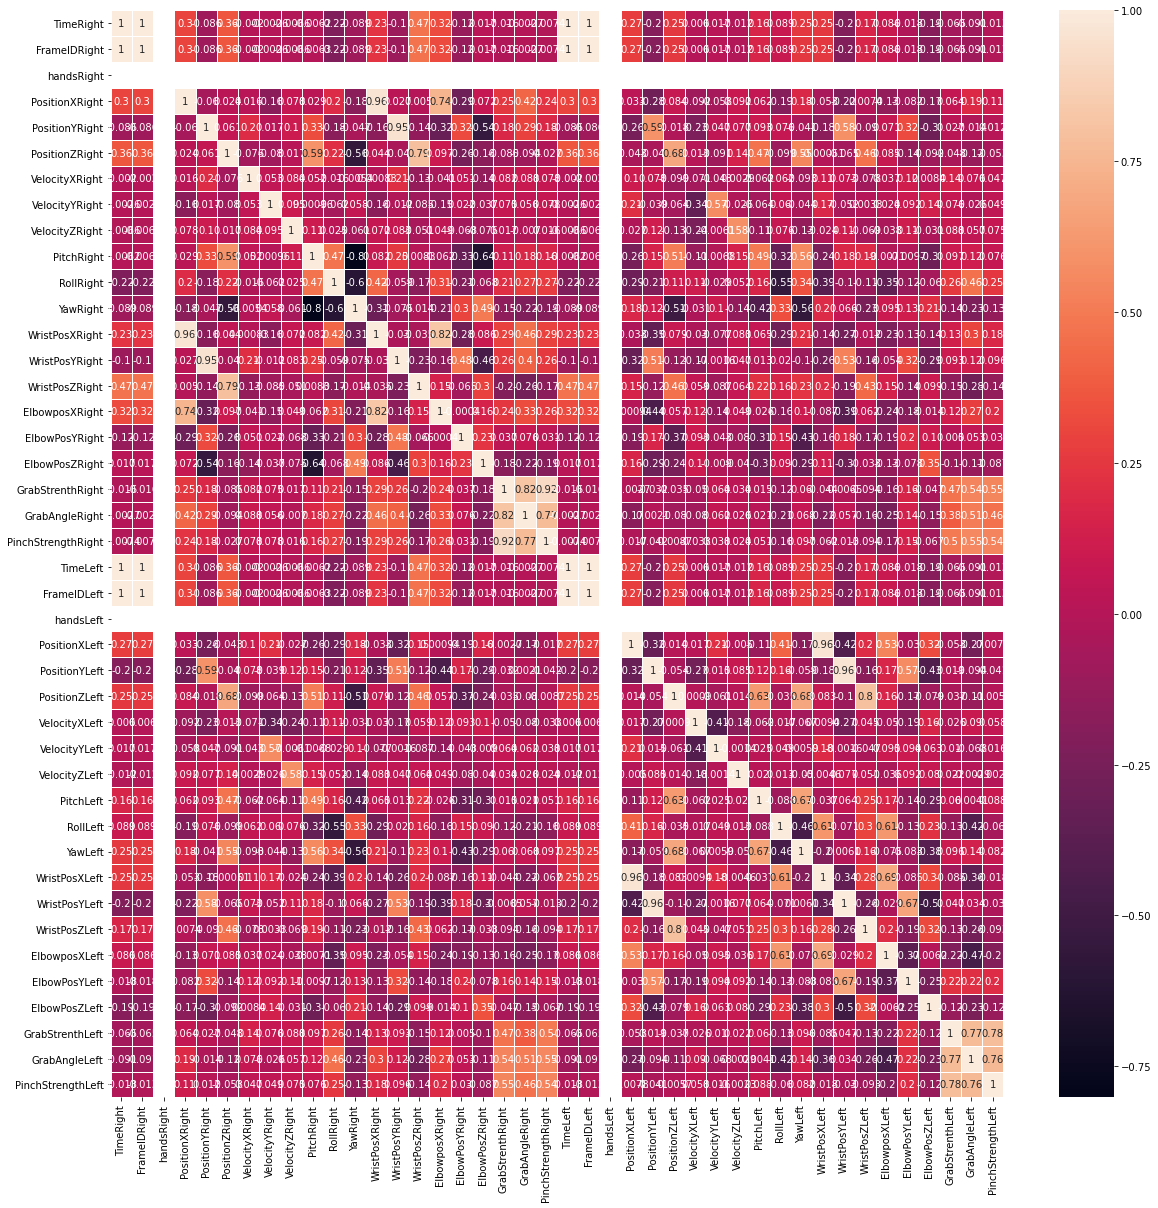

In [87]:
corr = df2.corr()
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(corr, annot=True ,linewidths=0.5, ax=ax)